In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [34]:
raw_data=pd.read_csv('insurance.csv')

In [35]:
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
data=raw_data.copy()
data['sex']=data['sex'].map({'female':1 ,'male':0})

In [37]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [38]:
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,NaN,NaN,2,4,NaN
top,NaN,NaN,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,NaN,NaN,1064,364,NaN
mean,39.207025,0.494768,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,0.500160,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,0.000000,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,NaN,NaN,16639.912515


In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

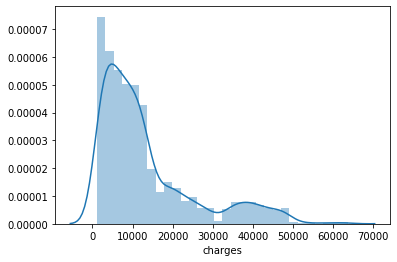

In [74]:
sns.distplot(data['charges'])

In [80]:
q=data['charges'].quantile(.99)
data_1=data[data['charges']<q]
data_1.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1324.000000,1324.000000,1324.000000,1324.000000,1324,1324,1324.000000
unique,NaN,NaN,NaN,NaN,2,4,NaN
top,NaN,NaN,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,NaN,NaN,1064,357,NaN
mean,39.089879,0.496224,30.585400,1.097432,NaN,NaN,12847.275434
std,14.025792,0.500175,6.067911,1.206693,NaN,NaN,11435.272603
min,18.000000,0.000000,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,NaN,NaN,4710.601913
50%,39.000000,0.000000,30.275000,1.000000,NaN,NaN,9283.021300
75%,51.000000,1.000000,34.443750,2.000000,NaN,NaN,16073.095438


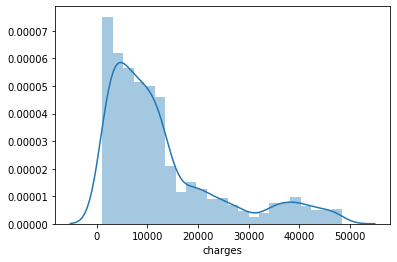

In [81]:
sns.distplot(data_1['charges'])

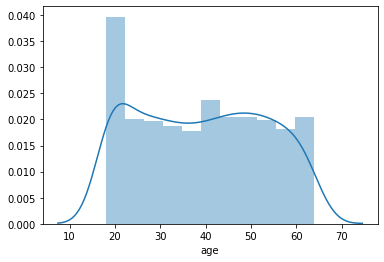

In [82]:
sns.distplot(data['age'])

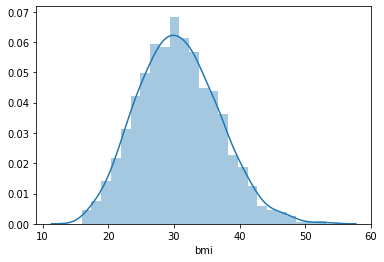

In [83]:
sns.distplot(data['bmi'])

In [41]:
y=data['charges']
x1=data[['sex','bmi']]


In [42]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     29.01
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           4.63e-13
Time:                        23:49:25   Log-Likelihood:                -14449.
No. Observations:                1338   AIC:                         2.890e+04
Df Residuals:                    1335   BIC:                         2.892e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1906.4246   1710.145      1.115      0.265   -1448.440    5261.289
sex        -1166.9940    649.416     -1.797      0.073   -2440.982     106.994
bmi          389.4347     53.264      7.311      0.000     284.945     493.924
==============================================================================
Omnibus:                      257.470   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.431
Skew:                           1.284   Prob(JB):                     1.86e-92
Kurtosis:                       3.990   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

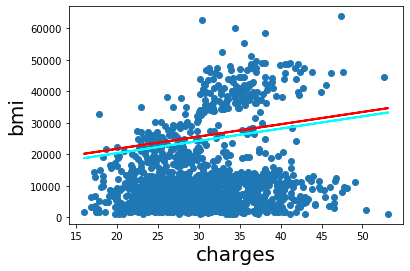

In [47]:
plt.scatter(data['bmi'],y)
yhat_no=1.396e+04+389.4347*data['bmi']
yhat_yes=12572.83+389.4347*data['bmi']
fig=plt.plot(data['bmi'],yhat_no,lw=2,c='red')
fig=plt.plot(data['bmi'],yhat_yes,lw=2,c='cyan')
plt.xlabel('charges',fontsize=20)
plt.ylabel('bmi',fontsize=20)
plt.show()

In [48]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)